# Data Prep

### Data Fetch From Trino


In [1]:
"""
This script establishes a connection to a Presto database via the Trino Python client, 
executes a SQL query to fetch data, and then structures the fetched data into a pandas DataFrame.
The DataFrame is Clusters with appropriate column names, making the data ready for analysis.
"""

import trino
import pandas as pd
import getpass
import datetime

# Get password
password = getpass.getpass("Enter your password: ")

# Connect to Trino
conn = trino.dbapi.connect(
    host="presto-gateway.corp.mongodb.com",
    port=443,
    user="jiawei.zhou@mongodb.com",
    catalog="awsdatacatalog",
    http_scheme="https",
    auth=trino.auth.BasicAuthentication("jiawei.zhou@mongodb.com", password),
)

# Execute query
cur = conn.cursor()

/Users/jiawei.zhou/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
cur.execute(
    f"""
select
	*
from
	awsdatacatalog.product_analytics.pnl_products_adoption_qualification_activation
"""
)

# Extract column names
columns = [desc[0] for desc in cur.description]

# Fetch rows
rows = cur.fetchall()

# Create DataFrame
df_raw = pd.DataFrame(rows, columns=columns)

In [3]:
# Set the maximum number of displayed rows
pd.set_option("display.max_rows", 100)

# Set the maximum number of displayed columns
pd.set_option("display.max_columns", 100)

# Data Profiling

In [4]:
# Create a copy of the original DataFrame
data = df_raw.copy()

# Display rows
data.head()

,cluster_mrr_total,org_id,org_name,org_plan_type,group_id,group_name,group_type,is_internal_org,cluster_id,cluster_name,deployment_cluster_name,cluster_name_prefix,monitoring_cluster_id,created_at,cluster_age_month,deleted_at,cloudprovider,cloudprovider_count,region,region_count,is_cross_region,instance_size,instance_family,instance_class,tier,is_deleted,topology,replicaset_count,is_sharding,shard_count,is_global_cluster,cluster_mdb_major_version,db_version,disk_size_gb,is_multi_tenant_mongo,is_backup_enabled_cluster,is_backup_selected,backup_option,is_auto_expand_storage,is_auto_scaling_compute_enabled,is_auto_scaling_compute_scaledown_enabled,cluster_electable_node_count,cluster_readonly_node_count,cluster_secondary_node_count,cluster_analytics_node_count,is_bi_connector,bi_node_type,cluster_state,disk_iops,ebs_volume_type,...,org_created_date,org_registration_date,org_type,org_country,org_latest_mrr,email_segment_clean,marketing_channel_group,channel_group,channel_type,account_segment,atlas_org_region,pw_language,first_cluster_instance_size,first_cluster_instance_size_group,self_serve_or_sales_sold,atlas_org_registration_date,users,system_normalized_cpu_user_monthly_daily_avg,connections_monthly_daily_avg,opcounter_cmd_monthly_daily_avg,reads_per_second_monthly_daily_avg,writes_per_second_monthly_daily_avg,document_crud_monthly_daily_avg,db_data_size_monthly_daily_avg,system_normalized_cpu_user_monthly_avg_daily_median,connections_monthly_avg_daily_median,opcounter_cmd_monthly_avg_daily_median,reads_per_second_monthly_avg_daily_median,writes_per_second_monthly_avg_daily_median,document_crud_monthly_avg_daily_median,db_data_size_avg_daily_median,ds,text_search_ds,text_search_ind,vector_search_ds,vector_search_ind,timeseries_ds,timeseries_ind,sync_ds,sync_ind,triggers_functions_ds,triggers_functions_ind,charts_ds,charts_ind,onlinearchive_ds,onlinearchive_ind,adf_ds,adf_ind,sql_ds,sql_ind
0,108.070417,5c900681014b760c65e3ec1e,Workfront,NDS_PRO,635a5b2484685727d0234e90,a-us-amazon(cmk),NDS,False,635a907398ccfe5e0d3c59c1,prd-1,atlas-ymm3ip,prd-1,[635a939e9a2f32702ee34124],2022-10-27 14:06:43.763,6.0,None,[AWS],1,[US_WEST_2],1,False,M10,None,General,PAID,False,REPLICASET,1,False,1,False,5.0,5.0.17,100.0,False,False,True,SNAPSHOTS,True,True,True,3.0,0.0,0.0,0.0,False,secondary,IDLE,3000.0,Gp3,...,2019-03-18 20:58:41.156,2019-03-18 20:58:41.188,NDS,US,91948.113194,Business,Direct,Direct,Non-Paid,Enterprise,AMER,None,M40,Dedicated,Sales Sold,2019-03-18,15.0,2.519645,345.129167,42.558224,1.836185,0.211279,1.713492,9.078896e+08,2.480089,287.466667,36.635195,1.647643,0.215413,1.409320,9.078149e+08,2023-04-01,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0
1,9.125000,60093e9ecc98cb3de7e53152,BasOrganization,NDS,63301705aa8df7316e969dd9,tourist_web,NDS,False,63ffb1834ec85529ea18d341,Cluster0,atlas-104lv3,ac-prr2xwx,[63ffb1b8be2dd81545631bf8],2023-03-01 20:11:47.206,1.0,None,[AWS],1,[EU_CENTRAL_1],1,False,M2,None,General,PAID,False,REPLICASET,1,False,1,False,6.0,6.0.5,2.0,False,False,True,TENANT,False,False,False,3.0,0.0,0.0,0.0,False,secondary,IDLE,NaN,None,...,2021-01-21 08:43:10.549,2021-01-21 08:44:41.006,NDS,TR,18.250000,Social,Direct,Direct,Non-Paid,High Tech,EMEA,None,M0,Free,Self Serve,2021-01-21,1.0,NaN,9.038889,0.198574,0.001656,0.001122,NaN,4.099202e+06,NaN,9.366667,0.198327,0.000083,0.000676,NaN,4.116315e+06,2023-04-01,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0
2,1676.262500,60c5b65295b0b10b5c0ce475,Eadbox,NDS,60d0e625b127eb1e2a8b6a63,production,NDS,False,6435a05602a0572750d1356b,EadboxAWS,atlas-248ru1,eadboxaws,[6435a1ece8c1b62ec670cc0b],2023-04-11 18:00:54.681,0.0,None,[AWS],1,[US_EAST_1],1,False,M50,None,General,PAID,False,REPLICASET,1,False,1,False,4.4,4.4.21,296.0,False,False,True,SNAPSHOTS,True,True,True,3.0,0.0,0.0,0.0,False,secondary,IDLE,3000.0,Gp3,...,2021-06-13 07:40:02.347,2021-06-18 16:34:45.351,NDS,BR,1915.489583,Business,Paid Search,Paid Search,Paid,High Tech,AMER,None,M10,Dedi

In [5]:
import pandas as pd

# Set pandas option to display float format without scientific notation
pd.set_option("display.float_format", "{:.2f}".format)

# Use the describe function and print the result
data.describe()

,cluster_mrr_total,created_at,cluster_age_month,cloudprovider_count,region_count,replicaset_count,shard_count,disk_size_gb,cluster_electable_node_count,cluster_readonly_node_count,cluster_secondary_node_count,cluster_analytics_node_count,disk_iops,connection_limit,database_limit,gb_per_week_in_limit,gb_per_week_out_limit,operations_per_second_limit,throttled_kb_per_second_limit,org_created_date,org_registration_date,org_latest_mrr,users,system_normalized_cpu_user_monthly_daily_avg,connections_monthly_daily_avg,opcounter_cmd_monthly_daily_avg,reads_per_second_monthly_daily_avg,writes_per_second_monthly_daily_avg,document_crud_monthly_daily_avg,db_data_size_monthly_daily_avg,system_normalized_cpu_user_monthly_avg_daily_median,connections_monthly_avg_daily_median,opcounter_cmd_monthly_avg_daily_median,reads_per_second_monthly_avg_daily_median,writes_per_second_monthly_avg_daily_median,document_crud_monthly_avg_daily_median,db_data_size_avg_daily_median,text_search_ind,vector_search_ind,timeseries_ind,sync_ind,triggers_functions_ind,charts_ind,onlinearchive_ind,adf_ind,sql_ind
count,2025815.00,2025782,2025782.00,2025815.00,2025815.00,2025815.00,2025815.00,2025815.00,2025782.00,2025782.00,2025782.00,2025782.00,1129597.00,334204.00,334204.00,272593.00,272593.00,272593.00,272593.00,2025775,2025774,2021570.00,1985182.00,1689039.00,1961589.00,1961440.00,1961738.00,1961738.00,1688781.00,1961738.00,1689039.00,1961589.00,1961440.00,1961738.00,1961738.00,1688781.00,1961738.00,2025815.00,2025815.00,2025815.00,2025815.00,2025815.00,2025815.00,2025815.00,2025815.00,2025815.00
mean,453.78,2022-01-26 23:05:44.357000448,18.82,1.00,1.06,1.02,1.02,124.60,3.08,0.01,0.01,0.02,3118.36,499.85,90.78,24.62,28.75,269.23,100.00,2020-08-13 09:21:58.909186304,2020-07-10 11:04:24.779190272,40054.89,12.16,4.55,183.13,57.36,80.61,34.62,641.57,121370858880.29,4.40,183.41,56.38,78.78,29.83,573.92,121479561265.73,0.03,0.00,0.01,0.01,0.04,0.04,0.01,0.01,0.00
min,0.01,2016-05-23 00:26:36.730000,0.00,1.00,1.00,1.00,1.00,1.00,3.00,0.00,0.00,0.00,100.00,0.00,50.00,20.00,20.00,0.00,100.00,2017-08-24 13:36:38.707000,2016-01-13 00:05:48.253000,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,58.52,2021-03-22 17:02:53.741999872,5.00,1.00,1.00,1.00,1.00,10.00,3.00,0.00,0.00,0.00,3000.00,500.00,100.00,20.00,20.00,200.00,100.00,2019-06-06 15:50:45.088000,2019-05-06 23:33:24.908000,151.74,1.00,2.14,53.07,15.07,0.95,0.18,1.01,733355128.36,2.11,53.03,15.08,0.90,0.19,0.93,733499160.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,74.83,2022-05-27 08:33:00.684000,14.00,1.00,1.00,1.00,1.00,10.00,3.00,0.00,0.00,0.00,3000.00,500.00,100.00,20.00,20.00,200.00,100.00,2020-07-29 15:03:20.032999936,2020-07-06 21:45:48.116999936,1442.87,3.00,2.95,71.80,16.65,1.82,0.25,4.12,1624930317.32,2.81,71.74,16.49,1.75,0.22,2.23,1625031724.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,205.40,2023-02-24 13:49:44.719000064,29.00,1.00,1.00,1.00,1.00,40.00,3.00,0.00,0.00,0.00,3000.00,500.00,100.00,20.00,20.00,200.00,100.00,2021-12-14 12:37:48.992999936,2021-11-29 07:06:31.400000,14688.66,6.00,4.62,132.21,27.70,12.56,1.94,59.96,11351208603.85,4.45,132.00,26.24,10.34,1.14,38.55,11352831455.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,413801.50,2024-02-29 00:33:09.244000,93.00,3.00,17.00,42.00,42.00,16384.00,210.00,30.00,3.00,14.00,64000.00,500.00,100.00,2000.00,100.00,2000.00,100.00,2024-02-28 23:42:06.881000,2024-02-28 23:42:07.055000,2340617.26,656.00,99.28,161251.72,118560.82,217043.03,526294.43,2458866.65,237755508943606.56,99.66,161319.71,117650.46,209043.79,579708.79,2520436.76,237763145256342.19,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
std,2623.88,NaN,16.44,0.06,0.34,0.31,0.31,421.62,0.99,0.22,0.07,0.14,1412.12,8.25,19.39,19.61,16.71,143.32,0.00,NaN,NaN,142067.68,45.25,5.69,873.24,407.19,741.51,738.64,9355.45,1413285339167.10,5.68,873.74,410.10,747.84,745.42,9381.29,1416808181823.39,0.18,0.04,0.09,0.

### Null & 0 Values

In [6]:
import pandas as pd

# Calculate the total number of clusters (rows in your DataFrame)
total_clusters = data.shape[0]

# Calculate the null values count for each column
null_values = data.isnull().sum()

# Calculate the percentage of null values for each column
null_values_percentage = (null_values / total_clusters) * 100

# Calculate the 0 values count for each column
zero_values = (data == 0).sum()

# Calculate the percentage of 0 values for each column
zero_values_percentage = (zero_values / total_clusters) * 100

# Create a DataFrame to display the null values count and percentage
null_values_df = pd.DataFrame(
    {"Null Count": null_values, "Null Percentage": null_values_percentage}
)

# Create a DataFrame to display the 0 values count and percentage
zero_values_df = pd.DataFrame(
    {"Zero Count": zero_values, "Zero Percentage": zero_values_percentage}
)

# Merge the two DataFrames for a comprehensive view
values_df = pd.concat([null_values_df, zero_values_df], axis=1)

# Format the percentage values to string with a '%' sign for better readability
values_df = values_df.applymap(lambda x: f"{x:.2f}%" if isinstance(x, float) else x)

# Display rows where the Null Count or Zero Count is greater than 0
filtered_values_df = values_df[
    (values_df["Null Count"] > 0) | (values_df["Zero Count"] > 0)
]

# If you want to see the result
filtered_values_df

,Null Count,Null Percentage,Zero Count,Zero Percentage
is_internal_org,0,0.00%,2025815,100.00%
deployment_cluster_name,33,0.00%,0,0.00%
cluster_name_prefix,33,0.00%,0,0.00%
monitoring_cluster_id,58036,2.86%,0,0.00%
created_at,33,0.00%,0,0.00%
cluster_age_month,33,0.00%,114017,5.63%
deleted_at,2025815,100.00%,0,0.00%
is_cross_region,0,0.00%,1938329,95.68%
instance_family,1225362,60.49%,0,0.00%
instance_class,61611,3.04%,0,0.00%


In [7]:
import pandas as pd

# Calculate the total number of clusters (rows in your DataFrame)
total_clusters = data.shape[0]

# Calculate the percentage of null values for each column
null_values_percentage = (data.isnull().sum() / total_clusters) * 100

# Identify columns to exclude from dropping (i.e., keep these columns regardless of their null percentage)
columns_to_keep = ["text_search_ds", "text_search_ind"]

# Find columns with >= 40% null values, excluding the specified columns
columns_to_drop = [
    col
    for col in null_values_percentage.index
    if null_values_percentage[col] >= 40 and col not in columns_to_keep
]

# Drop these columns from the DataFrame
data = data.drop(columns=columns_to_drop)

### Variables Distribution

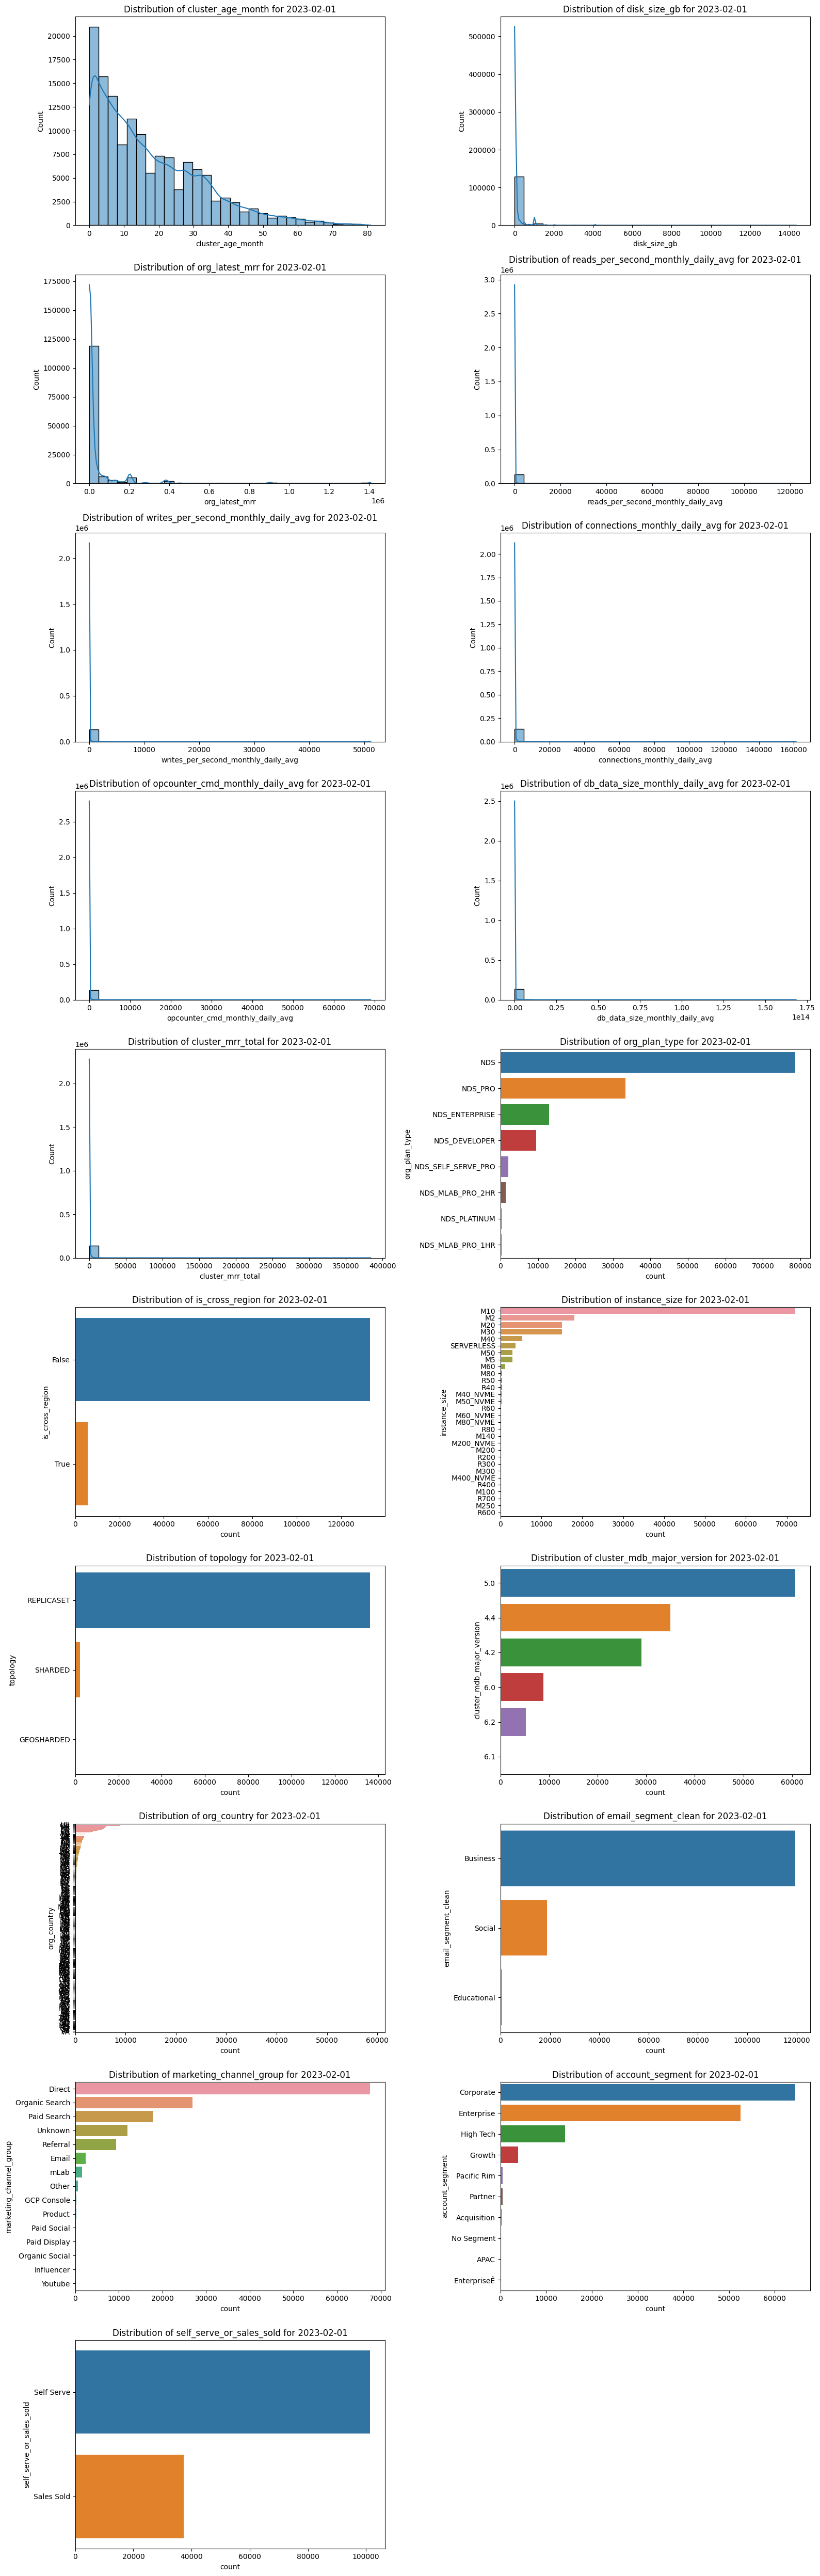

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Convert 'ds' to datetime format
data["ds"] = pd.to_datetime(data["ds"])

# Filtering the data for 'ds = 2023-02-01'
filtered_data = data[data["ds"] == "2023-02-01"]

# Update the lists of features as per your specification
categorical_features = [
    "org_plan_type",
    "is_cross_region",
    "instance_size",
    "topology",
    "cluster_mdb_major_version",
    "org_country",
    "email_segment_clean",
    "marketing_channel_group",
    "account_segment",
    "self_serve_or_sales_sold",
]

numerical_features = [
    "cluster_age_month",
    "disk_size_gb",
    "org_latest_mrr",
    "reads_per_second_monthly_daily_avg",
    "writes_per_second_monthly_daily_avg",
    "connections_monthly_daily_avg",
    "opcounter_cmd_monthly_daily_avg",
    "db_data_size_monthly_daily_avg",
    "cluster_mrr_total",
]

# Calculate the number of plots needed
num_plots = len(categorical_features) + len(numerical_features)
cols = 2
rows = num_plots // cols + (num_plots % cols > 0)

plt.figure(
    figsize=(16, max(5 * rows, 20))
)  # Adjusting the figure size based on the number of plots

# Plotting histograms for the new set of numerical variables
for i, var in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(filtered_data[var], kde=True, bins=30)
    plt.title(f"Distribution of {var} for 2023-02-01")

# Plotting bar plots for the new set of categorical variables
for j, var in enumerate(categorical_features, len(numerical_features) + 1):
    plt.subplot(rows, cols, j)
    order = filtered_data[var].value_counts().index
    sns.countplot(y=var, data=filtered_data, order=order)
    plt.title(f"Distribution of {var} for 2023-02-01")

plt.tight_layout()
plt.show()

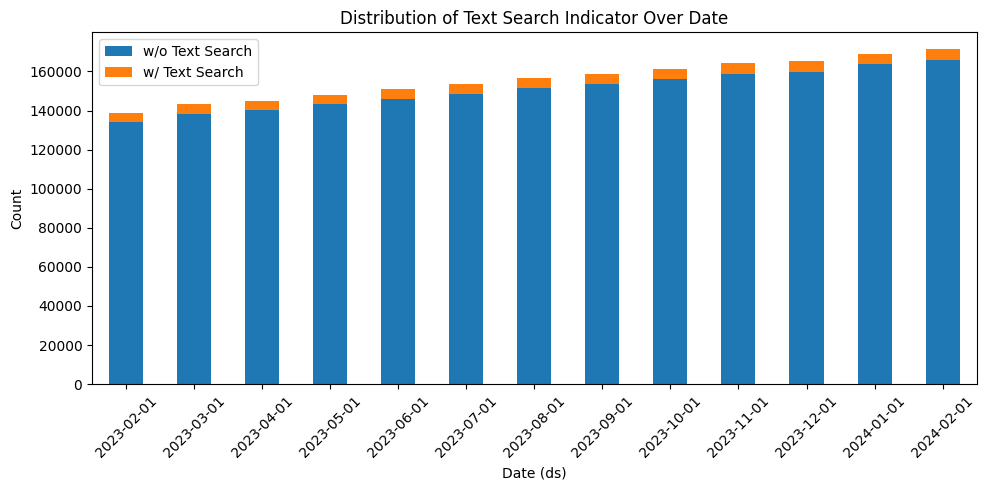

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the distribution of the 'text_search_ind' target variable over the 'ds' date
target_distribution_over_ds = (
    data.groupby("ds")["text_search_ind"].value_counts().unstack(fill_value=0)
)

# Convert the index (which is 'ds') to datetime objects first
target_distribution_over_ds.index = pd.to_datetime(target_distribution_over_ds.index)

# Now, you can safely extract the date part only to ignore the time part
target_distribution_over_ds.index = target_distribution_over_ds.index.date

# Plotting the distribution
target_distribution_over_ds.plot(kind="bar", stacked=True, figsize=(10, 5))
plt.title("Distribution of Text Search Indicator Over Date")
plt.xlabel("Date (ds)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(
    labels=["w/o Text Search", "w/ Text Search"],
    loc="upper left",
)
plt.tight_layout()
plt.grid(False)
plt.show()

# Matching Process

### Assigning Treatment & Control

In [30]:
import pandas as pd

# Create a copy of the original DataFrame
data = df_raw.copy()

data["ds"] = pd.to_datetime(data["ds"])
data["text_search_ds"] = pd.to_datetime(data["text_search_ds"])

# Determine the earliest text_search_ds date for each cluster
earliest_text_search = data.groupby("cluster_id")["text_search_ds"].min().reset_index()


def assign_group(row):
    # Convert string dates to datetime objects for comparison
    start_date = pd.to_datetime("2023-02-01")
    end_date = pd.to_datetime("2023-12-31")

    if pd.isnull(row["text_search_ds"]):
        return "control group"
    elif row["text_search_ds"] < start_date or row["text_search_ds"] > end_date:
        return "not eligible"
    elif start_date <= row["text_search_ds"] <= end_date:
        return "treatment group"
    else:
        return "control group"


earliest_text_search["group_assignment"] = earliest_text_search.apply(
    assign_group, axis=1
)


# Merge the group assignment back to the original dataset
data = pd.merge(
    data,
    earliest_text_search[["cluster_id", "group_assignment"]],
    on="cluster_id",
    how="left",
)

In [31]:
# Ensure 'text_search_ds' is in datetime format
data["text_search_ds"] = pd.to_datetime(data["text_search_ds"], errors="coerce")

# 1. Count of all unique clusters
total_unique_clusters = data["cluster_id"].nunique()

# 2. Count of unique clusters with 'text_search_ind' equal to 1
unique_clusters_text_search_ind_1 = data[data["text_search_ind"] == 1][
    "cluster_id"
].nunique()

# 3. Count of unique clusters with 'text_search_ds' >= '2023-02-01' and <= '2023-12-31'
unique_clusters_text_search_ds = data[
    (data["text_search_ds"] >= "2023-02-01") & (data["text_search_ds"] <= "2023-12-31")
]["cluster_id"].nunique()

# 4. Count of unique clusters in each 'group_assignment'
unique_clusters_per_group_assignment = data.groupby("group_assignment")[
    "cluster_id"
].nunique()

# Display the results
print(f"Total number of unique clusters: {total_unique_clusters}")
print(
    f"Unique clusters with 'text_search_ind' = 1: {unique_clusters_text_search_ind_1}"
)
print(
    f"Unique clusters with 'text_search_ds' >= '2023-02-01': {unique_clusters_text_search_ds}"
)
print("Unique clusters in each 'group_assignment':")
unique_clusters_per_group_assignment

Total number of unique clusters: 247167
Unique clusters with 'text_search_ind' = 1: 6030
Unique clusters with 'text_search_ds' >= '2023-02-01': 2739
Unique clusters in each 'group_assignment':


group_assignment
control group      241137
not eligible         3291
treatment group      2739
Name: cluster_id, dtype: int64

In [32]:
import pandas as pd
import numpy as np

# Convert 'ds' and 'text_search_ds' to datetime format in one step
data[["ds", "text_search_ds"]] = data[["ds", "text_search_ds"]].apply(pd.to_datetime)

# Define the filtering conditions in advance to improve readability
eligible = data["group_assignment"] != "not eligible"
date_range = (data["ds"] >= "2023-02-01") & (data["ds"] <= "2023-12-31")
not_deleted = data["is_deleted"] != True  # Add not deleted filter
mrr_greater_than_zero = data["cluster_mrr_total"] > 0  # Add MRR > 0 filter

# Apply all filtering conditions
data = data[eligible & date_range & not_deleted & mrr_greater_than_zero]

# Use a single line to create 'same_month_indicator' by comparing years and months directly
data["same_month_indicator"] = (
    (data["ds"].dt.to_period("M") == data["text_search_ds"].dt.to_period("M"))
).astype(int)

# Convert 'ds' to a 'month_year' period format for monthly analysis directly
data["month_year"] = data["ds"].dt.to_period("M")

# Set 'text_search_month_indicator' using period comparison for simplicity
data["text_search_month_indicator"] = (
    data["text_search_ds"].notnull()
    & (data["text_search_ds"].dt.to_period("M") <= data["month_year"])
).astype(int)

In [33]:
# Group by 'text_search_ind' and count unique 'cluster_id's
unique_clusters_text_search_ind = data.groupby("text_search_ind")[
    "cluster_id"
].nunique()
print("Unique clusters by text_search_ind:\n", unique_clusters_text_search_ind)

# Group by 'same_month_indicator' and count unique 'cluster_id's
unique_clusters_same_month_indicator = data.groupby("same_month_indicator")[
    "cluster_id"
].nunique()
print(
    "\nUnique clusters by same_month_indicator:\n", unique_clusters_same_month_indicator
)

# Group by 'group_assignment' and count unique 'cluster_id's
unique_clusters_group_assignment = data.groupby("group_assignment")[
    "cluster_id"
].nunique()
print("\nUnique clusters by group_assignment:\n", unique_clusters_group_assignment)

Unique clusters by text_search_ind:
 text_search_ind
0    222045
1      2739
Name: cluster_id, dtype: int64

Unique clusters by same_month_indicator:
 same_month_indicator
0    224773
1      2726
Name: cluster_id, dtype: int64

Unique clusters by group_assignment:
 group_assignment
control group      222045
treatment group      2739
Name: cluster_id, dtype: int64


### Check Missing Values

In [34]:
import pandas as pd

# Ensure 'ds' column is in datetime format (if not already done)
data["ds"] = pd.to_datetime(data["ds"])

# Filtering the DataFrame for rows where 'ds' equals '2023-02-01'
filtered_data = data[data["ds"] == "2023-02-01"]

# Calculate missing values per column for each 'group_assignment' category in the filtered DataFrame
missing_values = (
    filtered_data[columns]
    .isnull()
    .groupby(filtered_data["group_assignment"], sort=False)
    .sum()
)

# Transpose the resulting DataFrame to switch rows and columns
missing_values_transposed = missing_values.T

# Add a 'Total Missing' row that sums missing values across all 'group_assignment' categories for each feature
missing_values_transposed["Total Missing"] = missing_values_transposed.sum(axis=1)

# Calculate the total number of clusters for each 'group_assignment' category in the filtered DataFrame
total_clusters = filtered_data.groupby("group_assignment")["cluster_id"].nunique()

# To include the 'Total Clusters' as part of the DataFrame, it should be treated as a column after the transposition
# This step involves adjusting the 'Total Clusters' calculation to match the index of 'missing_values_transposed' for direct insertion
missing_values_transposed.loc["Total Clusters"] = total_clusters.reindex(
    missing_values_transposed.columns, fill_value=0
)
missing_values_transposed.loc["Total Clusters", "Total Missing"] = total_clusters.sum()

# Show the DataFrame
missing_values_transposed

group_assignment,control group,treatment group,Total Missing
cluster_mrr_total,0,0,0
org_id,0,0,0
org_name,0,0,0
org_plan_type,0,0,0
group_id,0,0,0
...,...,...,...
adf_ds,132567,1733,134300
adf_ind,0,0,0
sql_ds,134011,1790,135801
sql_ind,0,0,0


In [35]:
# Ensure 'ds' column is in datetime format (if not already done)
data["ds"] = pd.to_datetime(data["ds"])

# Filter the DataFrame for rows where 'ds' equals '2023-02-01'
filtered_data = data[data["ds"] == "2023-02-01"]

# Calculate the percentage of rows with any missing value, grouped by 'group_assignment'
# Only considering the filtered data for '2023-02-01'
percentage_missing = (
    filtered_data[columns]
    .isnull()
    .any(axis=1)
    .groupby(filtered_data["group_assignment"])
    .mean()
    * 100
)

# Format the output with a '%' sign
formatted_percentage_missing = percentage_missing.apply(lambda x: f"{x:.2f}%")

# Display the formatted percentages
formatted_percentage_missing

group_assignment
control group      100.00%
treatment group    100.00%
dtype: object

### XGBoost & Feature Importance

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import (
    roc_auc_score,
    precision_recall_curve,
    auc,
    cohen_kappa_score,
    matthews_corrcoef,
    log_loss,
)
from sklearn.pipeline import make_pipeline

# Filter dataset for ds='2023-12-01'
data_filtered = data[data["ds"] == "2023-12-01"]

# Define features and target
features = [
    "cluster_age_month",
    "org_plan_type",
    "is_cross_region",
    "instance_size",
    "topology",
    "cluster_mdb_major_version",
    "disk_size_gb",
    "org_country",
    "org_latest_mrr",
    "email_segment_clean",
    "marketing_channel_group",
    "self_serve_or_sales_sold",
    "reads_per_second_monthly_daily_avg",
]
X = data_filtered[features]
y = data_filtered["text_search_month_indicator"]

# Drop rows with any null values in the features
X = X.dropna()
y = y[X.index]

# Apply Label Encoding to categorical features
le = LabelEncoder()
for column in X.select_dtypes(include=["object"]).columns:
    X[column] = le.fit_transform(X[column])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Address imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Logistic Regression classifier within a pipeline that includes scaling
model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
model.fit(X_train_smote, y_train_smote)

# Predict and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[
    :, 1
]  # Probability estimates for the positive class

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print additional evaluation metrics
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")
print(f"Cohen’s Kappa: {cohen_kappa:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Log Loss: {logloss:.4f}")

# Extract the logistic regression model from the pipeline
logistic_regression_model = model.named_steps["logisticregression"]

# Get the coefficients from the logistic regression model
coefficients = logistic_regression_model.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients})

# Calculate the absolute values of coefficients to determine their impact regardless of direction (positive/negative)
feature_importance["Absolute_Coefficient"] = feature_importance["Coefficient"].abs()

# Sort the features by their absolute coefficient values in descending order
feature_importance = feature_importance.sort_values(
    by="Absolute_Coefficient", ascending=False
)

# Display the sorted feature importance
feature_importance

              precision    recall  f1-score   support

           0       0.99      0.65      0.78     31000
           1       0.02      0.53      0.05       525

    accuracy                           0.64     31525
   macro avg       0.51      0.59      0.41     31525
weighted avg       0.97      0.64      0.77     31525

[[20015 10985]
 [  249   276]]
ROC-AUC Score: 0.6419
Precision-Recall AUC: 0.0313
Cohen’s Kappa: 0.0155
Matthews Correlation Coefficient: 0.0458
Log Loss: 0.6236


,Feature,Coefficient,Absolute_Coefficient
8,org_latest_mrr,-0.89,0.89
3,instance_size,0.44,0.44
1,org_plan_type,-0.32,0.32
4,topology,-0.32,0.32
11,self_serve_or_sales_sold,-0.28,0.28
0,cluster_age_month,-0.27,0.27
9,email_segment_clean,-0.25,0.25
2,is_cross_region,0.21,0.21
12,reads_per_second_monthly_daily_avg,0.10,0.10
6,disk_size_gb,0.10,0.10


### Exact + Fuzzy Match

In [37]:
# import pandas as pd
# import numpy as np

# base_match_variable = 'month_year'
# final_refine_variable = 'cluster_mrr_total'
# match_order = ['org_latest_mrr', 'instance_size', 'org_plan_type', 'topology', 'cluster_age_month']
# data.loc[:, 'pair_index'] = pd.NA
# global_pair_index = 0  # Start with a global unique index

# unique_months = data[base_match_variable].drop_duplicates()

# for month in unique_months:
#     month_data = data[data[base_match_variable] == month].copy()

#     # Outlier removal for 'cluster_mrr_total'
#     Q1 = month_data[final_refine_variable].quantile(0.25)
#     Q3 = month_data[final_refine_variable].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     month_data = month_data[(month_data[final_refine_variable] >= lower_bound) & (month_data[final_refine_variable] <= upper_bound)]

#     treatment_data = month_data[(month_data['group_assignment'] == 'treatment group') & (month_data['same_month_indicator'] == 1)]
#     control_data = month_data[month_data['group_assignment'] == 'control group'].copy()

#     for t_index, t_row in treatment_data.iterrows():
#         potential_matches = control_data.copy()

#         for feature in match_order:
#             if feature in ['org_latest_mrr', 'cluster_age_month']:  # Numerical features
#                 match_value = t_row[feature]
#                 potential_matches = potential_matches[
#                     (potential_matches[feature] >= match_value * 0.9) &
#                     (potential_matches[feature] <= match_value * 1.1)
#                 ]
#             else:  # Categorical features
#                 potential_matches = potential_matches[potential_matches[feature] == t_row[feature]]

#             if len(potential_matches) < 3:
#                 break

#         # If multiple potential matches exist after all features, refine based on the closest 'cluster_mrr_total'
#         if not potential_matches.empty:
#             potential_matches['difference'] = abs(potential_matches[final_refine_variable] - t_row[final_refine_variable])
#             closest_match_index = potential_matches['difference'].idxmin()

#             # Update 'pair_index' for both treatment and matched control
#             data.loc[t_index, 'pair_index'] = global_pair_index
#             data.loc[closest_match_index, 'pair_index'] = global_pair_index
#             global_pair_index += 1  # Increment for the next pair

#             # Remove the matched control to avoid reusing
#             control_data = control_data.drop(closest_match_index)

# # Convert 'pair_index' to Int64 and filter unmatched entries
# data['pair_index'] = data['pair_index'].astype('Int64')
# final_matched_dataset = data.dropna(subset=['pair_index'])

# # Further refinement or analysis can be performed on `final_matched_dataset` as needed

In [38]:
import pandas as pd
import numpy as np

base_match_variable = "month_year"
final_refine_variable = "cluster_mrr_total"
match_order = feature_importance['Feature'].head(6).tolist()
# match_order = [
#     "org_latest_mrr",
#     "instance_size",
#     "org_plan_type",
#     "topology",
#     "cluster_age_month",
# ]
data.loc[:, "pair_index"] = pd.NA
global_pair_index = 0

unique_months = data[base_match_variable].drop_duplicates()

for month in unique_months:
    month_data = data[data[base_match_variable] == month].copy()

    # Remove outliers for 'cluster_mrr_total'
    Q1 = month_data[final_refine_variable].quantile(0.25)
    Q3 = month_data[final_refine_variable].quantile(0.75)
    IQR = Q3 - Q1
    # Keep rows that are not considered outliers
    month_data = month_data[
        (month_data[final_refine_variable] >= (Q1 - 1.5 * IQR))
        & (month_data[final_refine_variable] <= (Q3 + 1.5 * IQR))
    ]

    treatment_data = month_data[
        (month_data["group_assignment"] == "treatment group")
        & (month_data["same_month_indicator"] == 1)
    ]
    control_data = month_data[month_data["group_assignment"] == "control group"].copy()

    for t_index, t_row in treatment_data.iterrows():
        potential_matches = control_data.copy()
        match_found = False  # Flag to indicate if a match has been found

        for feature in match_order:
            initial_potential_matches = (
                potential_matches.copy()
            )  # Keep a copy before filtering

            if feature in ["org_latest_mrr", "cluster_age_month"]:  # Numerical features
                match_value = t_row[feature]
                potential_matches = potential_matches[
                    (potential_matches[feature] >= match_value * 0.9)
                    & (potential_matches[feature] <= match_value * 1.1)
                ]
            else:  # Categorical features
                potential_matches = potential_matches[
                    potential_matches[feature] == t_row[feature]
                ]

            if potential_matches.empty:
                potential_matches = initial_potential_matches  # Restore before filtering if no match found
            else:
                match_found = True  # Update flag when matches are found

            if len(potential_matches) < 3:
                break

        # If matches are found for any feature
        if match_found and not potential_matches.empty:
            potential_matches["difference"] = abs(
                potential_matches[final_refine_variable] - t_row[final_refine_variable]
            )
            closest_match_index = potential_matches["difference"].idxmin()

            # Update 'pair_index' for both treatment and matched control
            data.loc[t_index, "pair_index"] = global_pair_index
            data.loc[closest_match_index, "pair_index"] = global_pair_index
            global_pair_index += 1  # Increment for the next pair

            # Remove the matched control to avoid reusing
            control_data = control_data.drop(closest_match_index)

# Convert 'pair_index' to Int64 and filter unmatched entries
data["pair_index"] = data["pair_index"].astype("Int64")
final_matched_dataset = data.dropna(subset=["pair_index"])

### Balance Check

In [39]:
# Calculate unique clusters in the treatment group from original data
unique_clusters_treatment_original = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "treatment group"
]["cluster_id"].nunique()
print(f"Unique clusters in treatment: {unique_clusters_treatment_original}")

# Calculate unique clusters in both groups from final_matched_dataset
unique_clusters_treatment_final = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "treatment group"
]["cluster_id"].nunique()
unique_clusters_control_final = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "control group"
]["cluster_id"].nunique()
print(
    f"Unique clusters in treatment: {unique_clusters_treatment_final}, control: {unique_clusters_control_final}"
)

# Calculate total cluster counts in both groups
total_clusters_treatment_final = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "treatment group"
]["cluster_id"].count()
total_clusters_control_final = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "control group"
]["cluster_id"].count()
print(
    f"Total clusters in treatment: {total_clusters_treatment_final}, control: {total_clusters_control_final}"
)

Unique clusters in treatment: 1610
Unique clusters in treatment: 1610, control: 1588
Total clusters in treatment: 1610, control: 1610


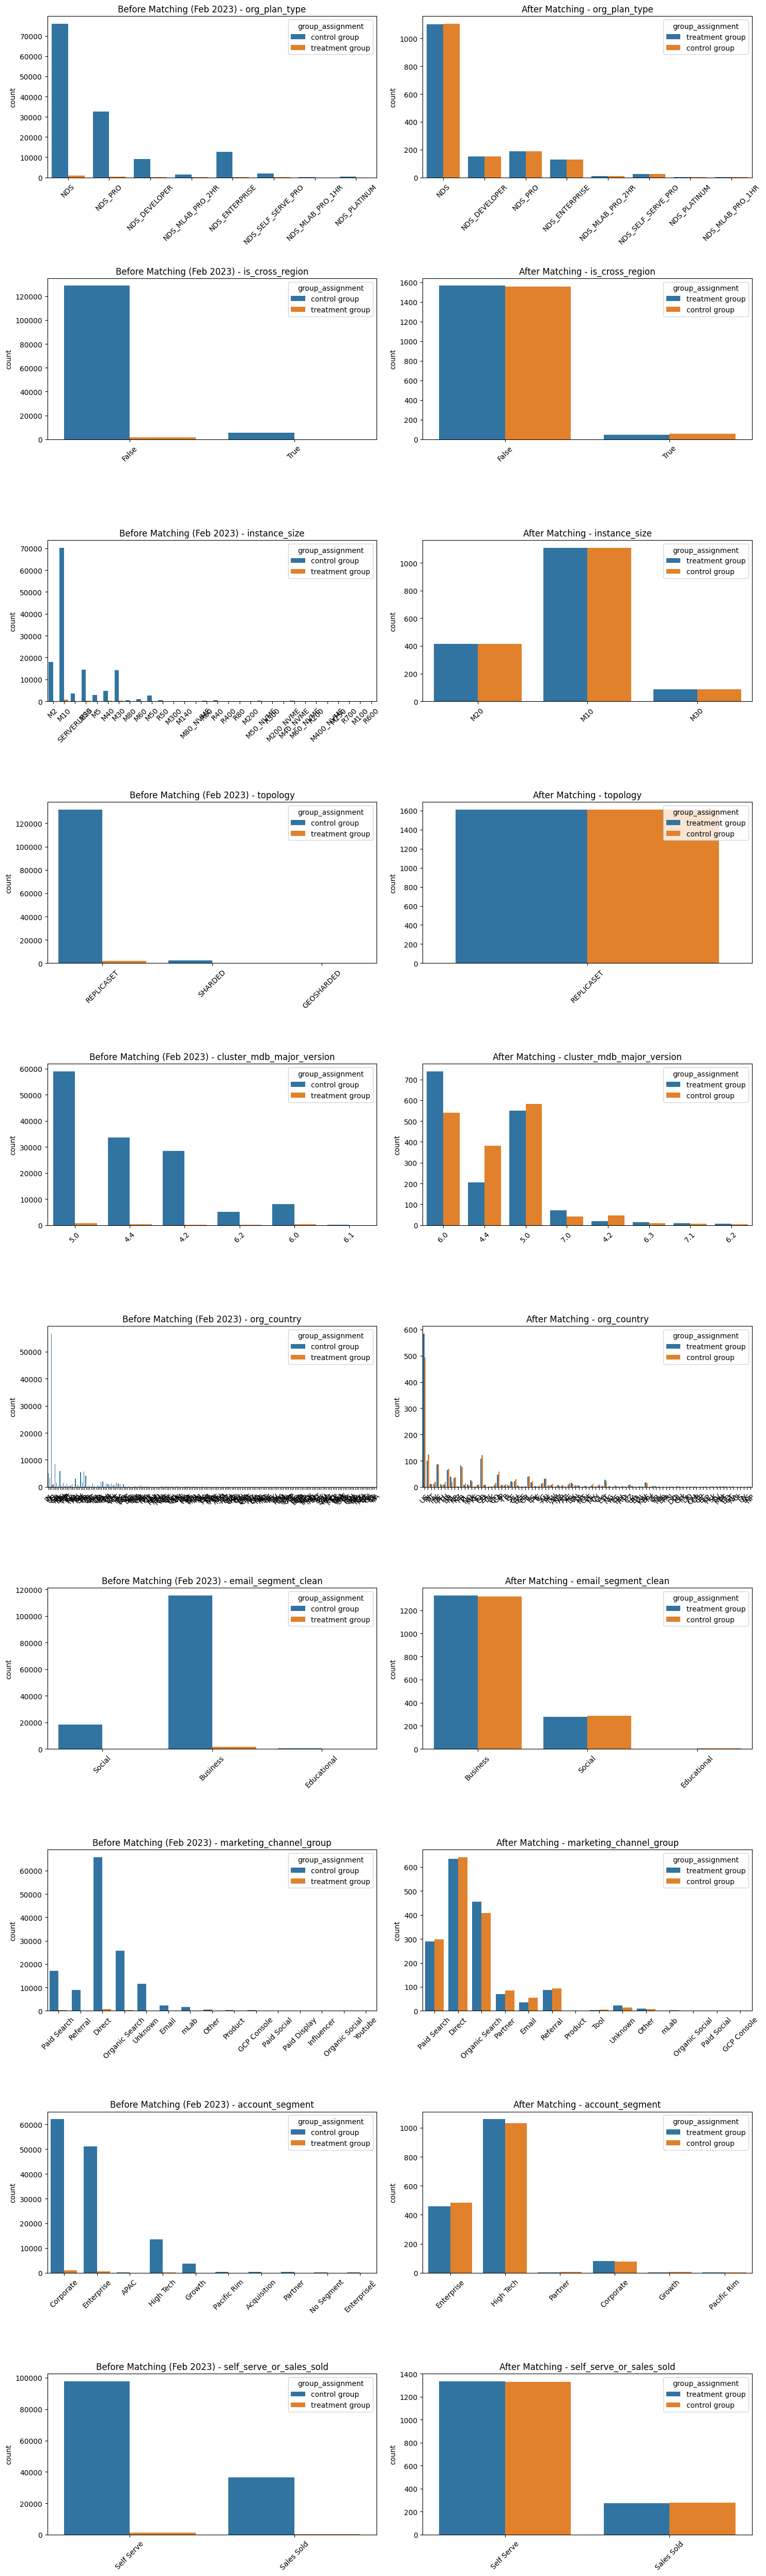

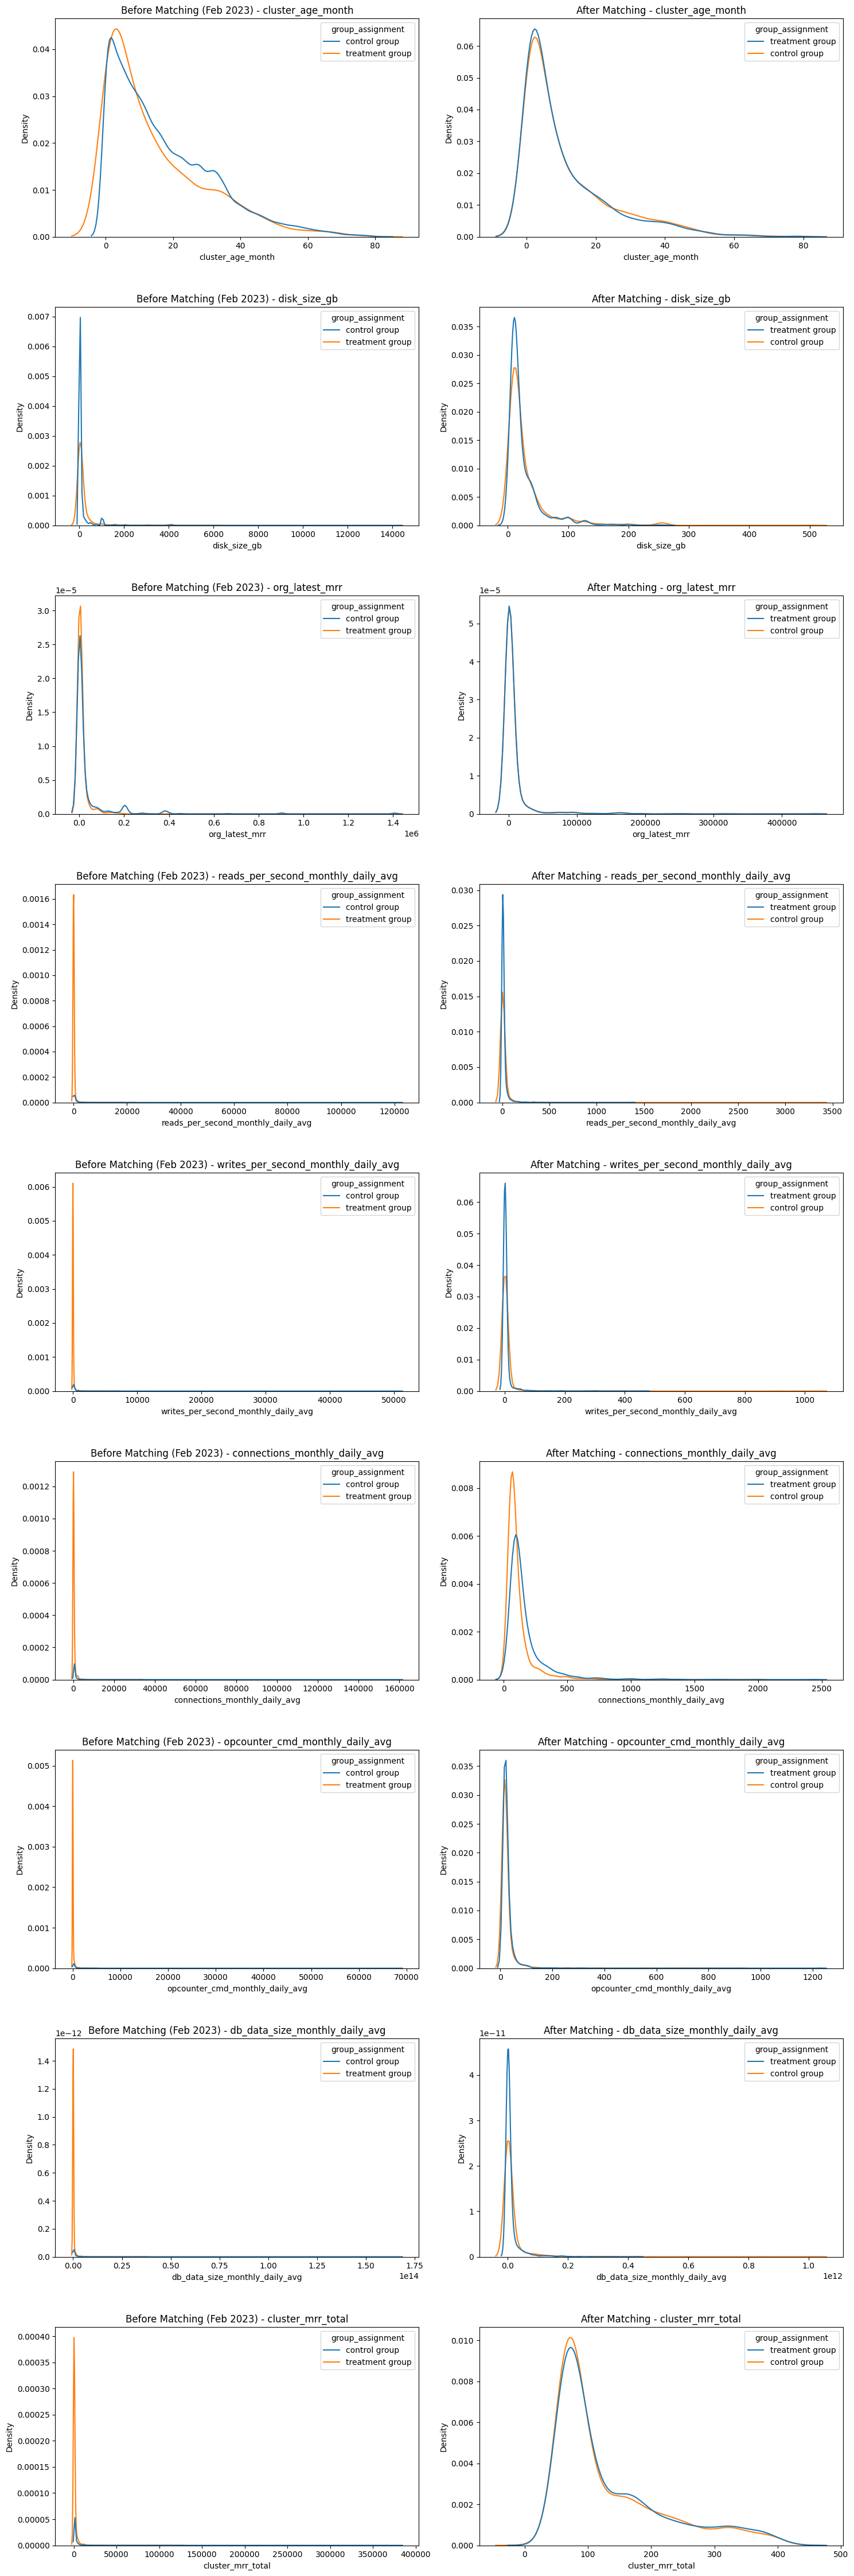

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical and numerical features
categorical_features = [
    "org_plan_type",
    "is_cross_region",
    "instance_size",
    "topology",
    "cluster_mdb_major_version",
    "org_country",
    "email_segment_clean",
    "marketing_channel_group",
    "account_segment",
    "self_serve_or_sales_sold",
]

numerical_features = [
    "cluster_age_month",
    "disk_size_gb",
    "org_latest_mrr",
    "reads_per_second_monthly_daily_avg",
    "writes_per_second_monthly_daily_avg",
    "connections_monthly_daily_avg",
    "opcounter_cmd_monthly_daily_avg",
    "db_data_size_monthly_daily_avg",
    "cluster_mrr_total",
]

# Filter data for Feb 2023
feb_2023_data = data[
    (data["ds"].dt.year == 2023)
    & (data["ds"].dt.month == 2)
    & (
        (data["group_assignment"] == "treatment group")
        | (data["group_assignment"] == "control group")
    )
]

# Plotting categorical features with count plots
fig, axes = plt.subplots(
    len(categorical_features),
    2,
    figsize=(15, 5 * len(categorical_features)),
    squeeze=False,
)
for i, feature in enumerate(categorical_features):
    # Before Matching - Feb 2023 Data
    sns.countplot(x=feature, hue="group_assignment", data=feb_2023_data, ax=axes[i, 0])
    axes[i, 0].set_title(f"Before Matching (Feb 2023) - {feature}")
    axes[i, 0].tick_params(axis="x", rotation=45)
    axes[i, 0].set_xlabel("")  # Remove x-label to save space

    # After Matching
    sns.countplot(
        x=feature, hue="group_assignment", data=final_matched_dataset, ax=axes[i, 1]
    )
    axes[i, 1].set_title(f"After Matching - {feature}")
    axes[i, 1].tick_params(axis="x", rotation=45)
    axes[i, 1].set_xlabel("")  # Remove x-label to save space

plt.tight_layout(h_pad=3)  # Adjust vertical spacing to prevent overlap
plt.show()

# Now, plotting numerical features with KDE plots
fig, axes = plt.subplots(
    len(numerical_features), 2, figsize=(15, 5 * len(numerical_features)), squeeze=False
)
for i, feature in enumerate(numerical_features):
    # Before Matching - Feb 2023 Data
    sns.kdeplot(
        data=feb_2023_data,
        x=feature,
        hue="group_assignment",
        ax=axes[i, 0],
        common_norm=False,
    )
    axes[i, 0].set_title(f"Before Matching (Feb 2023) - {feature}")

    # After Matching
    sns.kdeplot(
        data=final_matched_dataset,
        x=feature,
        hue="group_assignment",
        ax=axes[i, 1],
        common_norm=False,
    )
    axes[i, 1].set_title(f"After Matching - {feature}")

plt.tight_layout(h_pad=3)
plt.show()

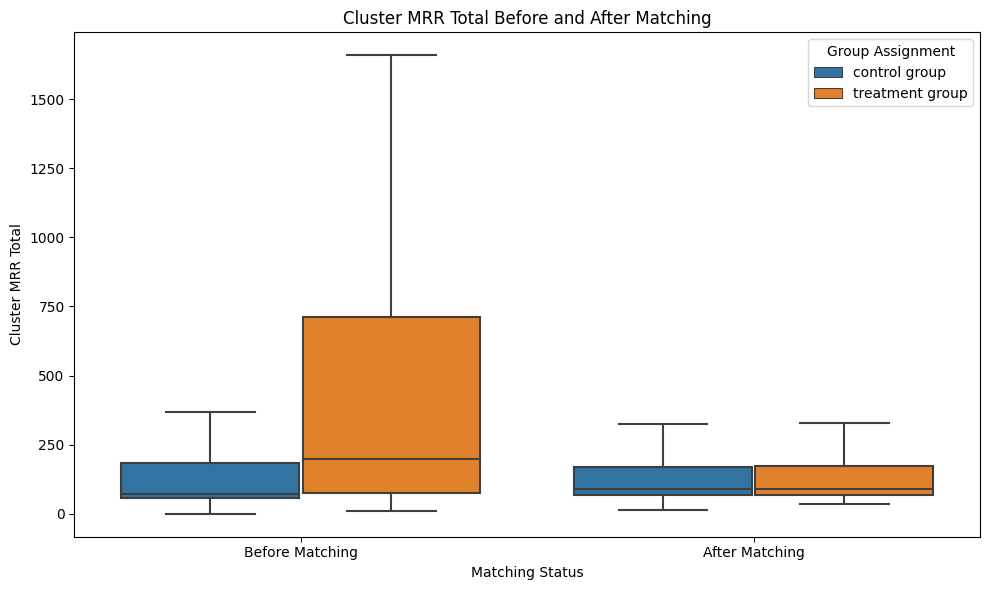

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for '2023-02-01' in 'data' for before matching, and use 'final_matched_dataset' for after matching
before_matching_data = data[data["ds"] == "2023-02-01"][
    ["group_assignment", "cluster_mrr_total"]
].copy()
before_matching_data["Match_Status"] = "Before Matching"

after_matching_data = final_matched_dataset[
    ["group_assignment", "cluster_mrr_total"]
].copy()
after_matching_data["Match_Status"] = "After Matching"

# Combine and plot without outliers
combined_data = pd.concat([before_matching_data, after_matching_data])
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Match_Status",
    y="cluster_mrr_total",
    hue="group_assignment",
    data=combined_data,
    showfliers=False,
)
plt.title("Cluster MRR Total Before and After Matching")
plt.xlabel("Matching Status")
plt.ylabel("Cluster MRR Total")
plt.legend(title="Group Assignment")
plt.tight_layout()
plt.show()

# Analysis

In [46]:
import pandas as pd
from datetime import datetime

# Copy df_raw to avoid altering the original DataFrame
data = df_raw.copy()

# Ensure 'ds' columns in the copied data and final_matched_dataset are datetime objects
data["ds"] = pd.to_datetime(data["ds"])
final_matched_dataset["ds"] = pd.to_datetime(final_matched_dataset["ds"])

# Merge final_matched_dataset with the filtered copied data on 'cluster_id'
merged_data = pd.merge(
    final_matched_dataset[["cluster_id", "ds"]],
    data[["cluster_id", "ds", "cluster_mrr_total"]],
    on="cluster_id",
    how="left",
    suffixes=("_final", "_raw"),
)

# Filter to include records where 'ds_raw' is equal to or after 'ds_final'
filtered_data = merged_data[merged_data["ds_raw"] >= merged_data["ds_final"]].copy()

# Calculate the month difference
filtered_data["month_diff"] = (
    (filtered_data["ds_raw"].dt.year - filtered_data["ds_final"].dt.year) * 12
    + filtered_data["ds_raw"].dt.month
    - filtered_data["ds_final"].dt.month
)

# Pivot the table based on 'month_diff' for MRR totals
pivot_mrr_totals = filtered_data.pivot_table(
    index="cluster_id",
    columns="month_diff",
    values="cluster_mrr_total",
    aggfunc="first",
).reset_index()

# Flatten the columns and rename them to "Month X"
pivot_mrr_totals.columns = ["cluster_id"] + [
    f"Month {col}" if isinstance(col, int) else col
    for col in pivot_mrr_totals.columns[1:]
]

# Merge the pivot table back into final_matched_dataset
final_dataset_with_monthly_mrr = pd.merge(
    final_matched_dataset, pivot_mrr_totals, on="cluster_id", how="left"
)

# Fixed date for imputation
fixed_date = datetime(2024, 2, 1)
mrr_columns = [col for col in final_dataset_with_monthly_mrr.columns if "Month" in col]


# Function to impute MRR values
def impute_mrr(row):
    for col in mrr_columns:
        month_num = int(col.split(" ")[1]) if "Month" in col else 0
        month_diff = (
            (fixed_date.year - row["ds"].year) * 12 + fixed_date.month - row["ds"].month
        )
        if pd.isnull(row[col]) and month_num <= month_diff:
            row[col] = 0
    return row


# Apply the imputation row-wise
final_dataset_with_monthly_mrr = final_dataset_with_monthly_mrr.apply(
    impute_mrr, axis=1
)

# Display the result
final_dataset_with_monthly_mrr.head()

,cluster_mrr_total,org_id,org_name,org_plan_type,group_id,group_name,group_type,is_internal_org,cluster_id,cluster_name,deployment_cluster_name,cluster_name_prefix,monitoring_cluster_id,created_at,cluster_age_month,deleted_at,cloudprovider,cloudprovider_count,region,region_count,is_cross_region,instance_size,instance_family,instance_class,tier,is_deleted,topology,replicaset_count,is_sharding,shard_count,is_global_cluster,cluster_mdb_major_version,db_version,disk_size_gb,is_multi_tenant_mongo,is_backup_enabled_cluster,is_backup_selected,backup_option,is_auto_expand_storage,is_auto_scaling_compute_enabled,is_auto_scaling_compute_scaledown_enabled,cluster_electable_node_count,cluster_readonly_node_count,cluster_secondary_node_count,cluster_analytics_node_count,is_bi_connector,bi_node_type,cluster_state,disk_iops,ebs_volume_type,...,connections_monthly_daily_avg,opcounter_cmd_monthly_daily_avg,reads_per_second_monthly_daily_avg,writes_per_second_monthly_daily_avg,document_crud_monthly_daily_avg,db_data_size_monthly_daily_avg,system_normalized_cpu_user_monthly_avg_daily_median,connections_monthly_avg_daily_median,opcounter_cmd_monthly_avg_daily_median,reads_per_second_monthly_avg_daily_median,writes_per_second_monthly_avg_daily_median,document_crud_monthly_avg_daily_median,db_data_size_avg_daily_median,ds,text_search_ds,text_search_ind,vector_search_ds,vector_search_ind,timeseries_ds,timeseries_ind,sync_ds,sync_ind,triggers_functions_ds,triggers_functions_ind,charts_ds,charts_ind,onlinearchive_ds,onlinearchive_ind,adf_ds,adf_ind,sql_ds,sql_ind,group_assignment,same_month_indicator,month_year,text_search_month_indicator,pair_index,Month 0,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12
0,163.85,6315f8dc8882020d9a256541,Mythical,NDS,6347fd4e91ab13578cdce960,mt-prod01,NDS,False,634d516a651bf527d6bb9b1b,mt-inventory-prod01,atlas-e8n28d,mt-inventory-prod01,[634d5472e10ec438c9bac022],2022-10-17 12:58:18.191,6.00,None,[GCP],1,[WESTERN_US],1,False,M20,None,General,PAID,False,REPLICASET,1,False,1,False,6.0,6.0.5,40.00,False,False,True,SNAPSHOTS,True,True,True,3.00,0.00,0.00,0.00,False,secondary,IDLE,NaN,None,...,91.84,17.71,3.67,0.25,30.52,623806597.01,5.24,91.77,17.68,3.78,0.25,30.09,623363789.43,2023-04-01,2023-04-07,1,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,treatment group,1,2023-04,1,0,163.85,166.35,168.92,173.14,176.91,217.64,243.02,279.89,236.98,233.80,244.16,NaN,NaN
1,186.83,5a3b3c0c3b34b94f2d41cd59,Interloop,NDS,5bd36c1155385534e037d4ad,Interloop,NDS,False,5eca83606c7cca57996eace5,Majority-Prod,atlas-j1f7qs,majority-prod,[5eca8526a9da78175822e56e],2020-05-24 14:23:28.575,35.00,None,[GCP],1,[EASTERN_US],1,False,M20,N2,General,PAID,False,REPLICASET,1,False,1,False,4.4,4.4.21,40.00,False,False,True,SNAPSHOTS,True,False,False,3.00,0.00,0.00,0.00,False,secondary,IDLE,NaN,None,...,117.25,19.78,4.50,0.34,522.15,22775541616.53,5.73,117.60,19.65,3.94,0.32,86.41,22775746232.87,2023-04-01,2023-04-08,1,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,treatment group,1,2023-04,1,1,186.83,185.53,185.51,191.06,191.57,254.11,272.76,274.59,274.99,278.56,280.57,NaN,NaN
2,60.35,609beb983fec8e4422883b6f,sipharmony,NDS,609beb983fec8e4422883b77,development,NDS,False,6334c004593f74604d0c9826,Cluster1,atlas-iftq2u,cluster1,[6334c3a6694df86af7ba7b52],2022-09-28 21:43:32.612,7.00,None,[GCP],1,[CENTRAL_US],1,False,M10,None,General,PAID,False,REPLICASET,1,False,1,False,5.0,5.0.17,10.00,False,False,True,SNAPSHOTS,True,False,False,3.00,0.00,0.00,0.00,False,secondary,IDLE,NaN,None,...,61.44,15.07,0.78,0.18,0.88,1550956391.85,3.80,60.90,15.08,0.80,0.19,0.74,1551973050.47,2023-04-01,NaT,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,control group,0,2023-04,0,8,60.35,60.32,60.39,60.52,60.51,62.79,63.33,63.43,64.17,65.84,69.88,NaN,NaN
3,75.07,617fb6307baf08364402c0d3,MakeStories's Org - 2021-11-01,NDS,639c20586cda0e03498827c3,Make-Production,NDS,False,63fc55b9ac290a5fd379875e,makefor

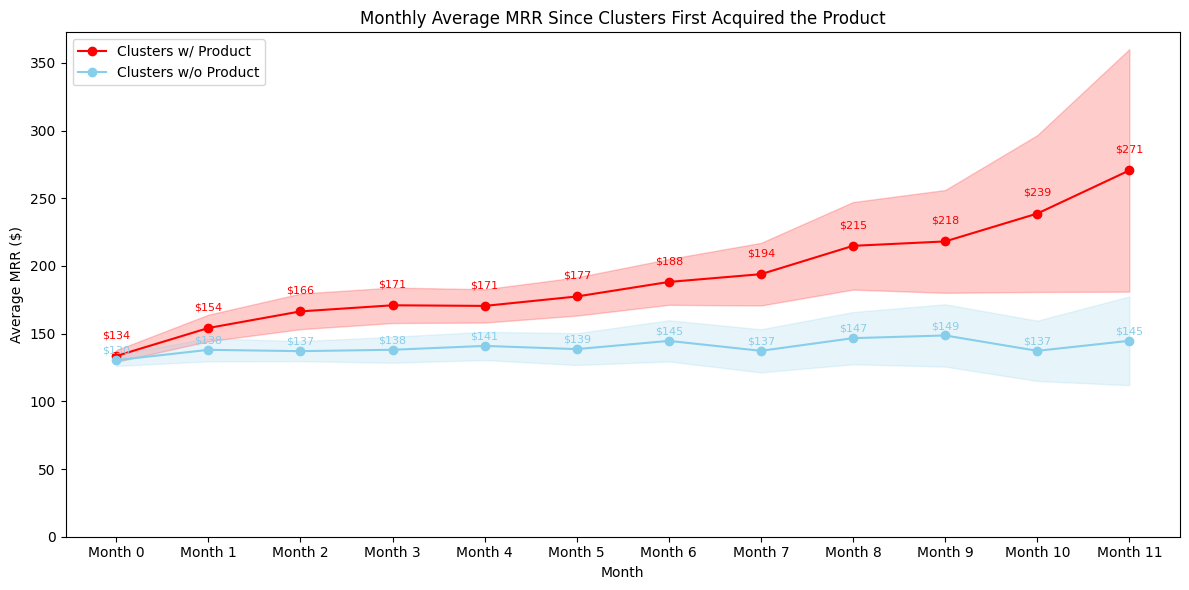

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem, t

# Dynamically generate MRR columns, ensuring only month columns 0 through 11 are selected
mrr_columns = [col for col in final_dataset_with_monthly_mrr.columns if "Month" in col]
mrr_columns = sorted(mrr_columns, key=lambda x: int(x.split(" ")[-1]))[:12]

def calculate_means_and_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = sem(data) if n > 1 else 0
    margin = std_err * t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - margin, mean + margin


original_group_colors = {"treatment group": "red", "control group": "skyblue"}
group_rename = {
    "treatment group": "Clusters w/ Product",
    "control group": "Clusters w/o Product",
}

plt.figure(figsize=(12, 6))

for original_group, color in original_group_colors.items():
    new_group_name = group_rename[original_group]
    means = []
    lower_cis = []
    upper_cis = []
    for month in mrr_columns:  # Loop through the filtered/selected month columns
        month_data = final_dataset_with_monthly_mrr[
            (final_dataset_with_monthly_mrr["group_assignment"] == original_group)
            & final_dataset_with_monthly_mrr[month].notna()
        ][month]
        mean, lower_ci, upper_ci = calculate_means_and_ci(month_data)
        means.append(mean)
        lower_cis.append(lower_ci)
        upper_cis.append(upper_ci)

    plt.plot(mrr_columns, means, marker="o", label=new_group_name, color=color)
    plt.fill_between(mrr_columns, lower_cis, upper_cis, color=color, alpha=0.2)

    for i, mean in enumerate(means):
        plt.text(
            mrr_columns[i],
            mean + (max(upper_cis) - min(lower_cis)) * 0.05,
            f"${mean:.0f}",
            ha="center",
            va="bottom",
            fontsize=8,
            color=color,
        )

plt.title("Monthly Average MRR Since Clusters First Acquired the Product")
plt.xlabel("Month")
plt.ylabel("Average MRR ($)")
plt.legend(loc="upper left")
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

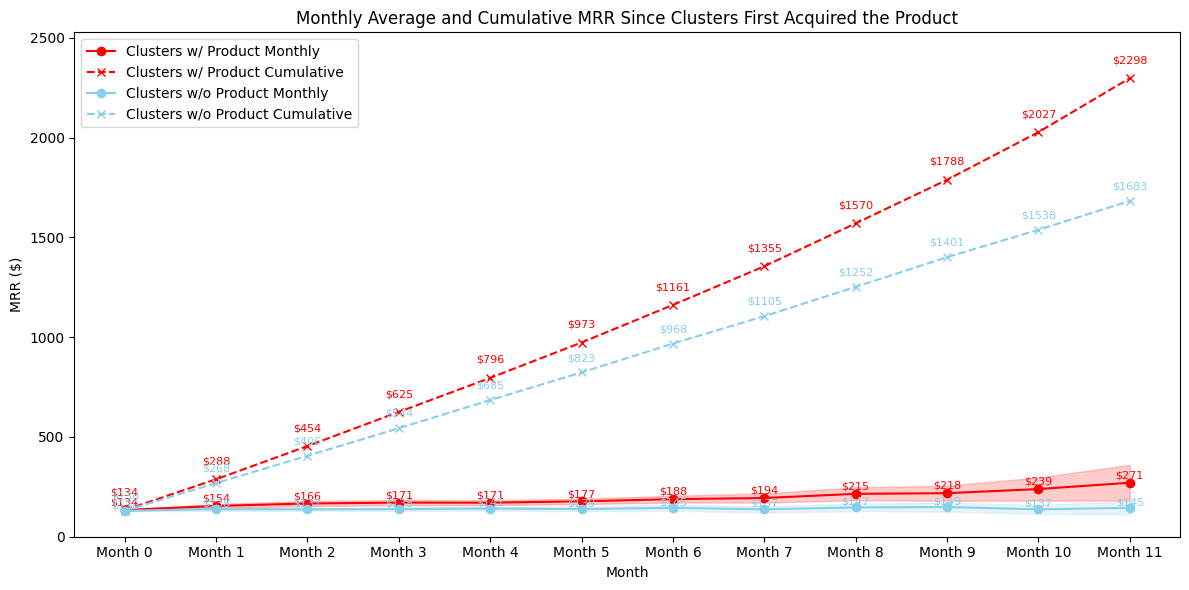

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem, t

def calculate_means_and_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = sem(data) if n > 1 else 0
    margin = std_err * t.ppf((1 + confidence) / 2.0, n - 1)
    return mean, mean - margin, mean + margin


original_group_colors = {"treatment group": "red", "control group": "skyblue"}
group_rename = {
    "treatment group": "Clusters w/ Product",
    "control group": "Clusters w/o Product",
}

# Initialize a variable for tracking the maximum cumulative MRR across both groups
cumulative_mrr_max = 0

plt.figure(figsize=(12, 6))

for original_group, color in original_group_colors.items():
    new_group_name = group_rename[original_group]
    means = []
    lower_cis = []
    upper_cis = []
    cumulative_mrr = []

    for month in mrr_columns:
        month_data = final_dataset_with_monthly_mrr[
            (final_dataset_with_monthly_mrr["group_assignment"] == original_group)
            & final_dataset_with_monthly_mrr[month].notna()
        ][month]

        mean, lower_ci, upper_ci = calculate_means_and_ci(month_data)

        means.append(mean)
        lower_cis.append(lower_ci)
        upper_cis.append(upper_ci)

    # Calculate cumulative MRR based on the monthly averages
    cumulative_mrr = np.cumsum(means)

    # Update cumulative_mrr_max if this group's max cumulative MRR is higher
    if max(cumulative_mrr) > cumulative_mrr_max:
        cumulative_mrr_max = max(cumulative_mrr)

    plt.plot(
        mrr_columns, means, marker="o", label=f"{new_group_name} Monthly", color=color
    )
    plt.fill_between(mrr_columns, lower_cis, upper_cis, color=color, alpha=0.2)

    # Plot cumulative MRR
    plt.plot(
        mrr_columns,
        cumulative_mrr,
        marker="x",
        linestyle="--",
        label=f"{new_group_name} Cumulative",
        color=color,
    )

    # Add data labels for cumulative MRR and monthly averages
    for i, value in enumerate(cumulative_mrr):
        plt.text(
            mrr_columns[i],
            value + (max(cumulative_mrr) - min(cumulative_mrr)) * 0.03,
            f"${value:.0f}",
            ha="center",
            va="bottom",
            fontsize=8,
            color=color,
        )

    for i, mean in enumerate(means):
        plt.text(
            mrr_columns[i],
            mean + (max(upper_cis) - min(lower_cis)) * 0.05,
            f"${mean:.0f}",
            ha="center",
            va="bottom",
            fontsize=8,
            color=color,
        )

plt.title(
    "Monthly Average and Cumulative MRR Since Clusters First Acquired the Product"
)
plt.xlabel("Month")
plt.ylabel("MRR ($)")
plt.legend(loc="upper left")
plt.ylim(
    bottom=0, top=cumulative_mrr_max * 1.1
)  # Set Y-axis limit based on max cumulative MRR
plt.tight_layout()
plt.show()

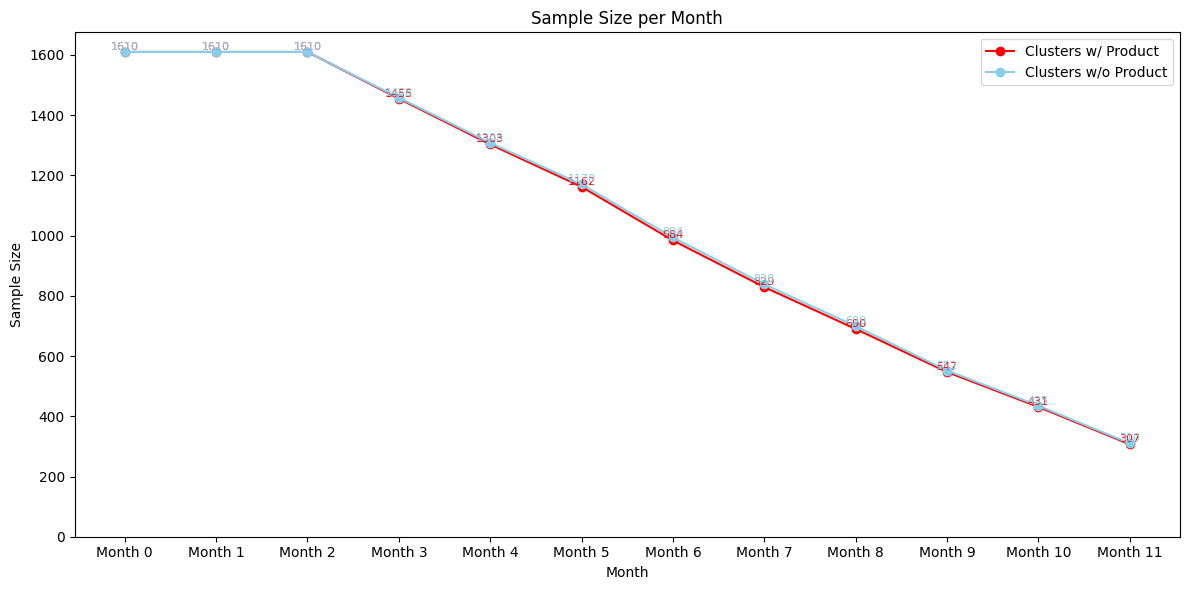

In [49]:
# Continuing from the previous script

plt.figure(figsize=(12, 6))

for original_group, color in original_group_colors.items():
    sample_sizes = []  # List to hold the sample size for each month
    for month in mrr_columns:
        # For each month, calculate the sample size of the non-null data for the current group
        sample_size = len(
            final_dataset_with_monthly_mrr[
                (final_dataset_with_monthly_mrr["group_assignment"] == original_group)
                & final_dataset_with_monthly_mrr[month].notna()
            ][month]
        )
        sample_sizes.append(sample_size)

    plt.plot(
        mrr_columns,
        sample_sizes,
        marker="o",
        linestyle="-",
        label=group_rename[original_group],
        color=color,
    )

    for i, size in enumerate(sample_sizes):
        plt.text(
            mrr_columns[i],
            size,
            f"{size}",
            ha="center",
            va="bottom",
            fontsize=8,
            color=color,
        )

plt.title("Sample Size per Month")
plt.xlabel("Month")
plt.ylabel("Sample Size")
plt.legend(loc="upper right")
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()